**Análisis de modelos**

**Preparación de datos**

Importamos los datos, preparamos el dataset y creamos los conjuntos de entrenamiento.

Creamos conjuntos de entrenamiento con diferentes algoritmos de oversampling

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from src.data_utils.data_utils import read_data, prepare_dummy_cols, normalize_num_vars
from src.model_utils.utils import boruta_selected_vars

excel_file_path = "D:\\develop\\predict_lapse\\data\\BBDD_Impago_1.0.xlsx"

df = read_data(excel_file_path)

cat_vars = ['Canal', 'Domiciliacion', 'Figuras', 'Motor', 'Pago', 'SegundoConductor', 'Tipo_Furgoneta', 'Tipo_Moto', 'Tipo_Turismo',  'Zonas_Zona1', 'Zonas_Zona2', 'Zonas_Zona3', 'Zonas_Zona4', 'Zonas_Zona5', 'Zonas_Zona6', 'Zonas_Zona7', 'Zonas_Zona8']

feature_cols = ['Pago', 'Domiciliacion', 'Anyomatricula', 'Prima', 'Valor',
                'ValorVehículo', 'Motor_2', 'Motor_3', 'Canal', 'Socioec', 'Antigüedad', 'Carnet', 'SegundoConductor', 'Figuras', 'Tipo_Moto', 'Tipo_Turismo', 'Zonas_Zona2', 'Zonas_Zona3', 'Zonas_Zona4', 'Zonas_Zona5', 'Zonas_Zona6', 'Zonas_Zona7', 'Zonas_Zona8']

df_dummy = prepare_dummy_cols(df, ['Tipo', 'Zonas', 'Motor'] )

num_vars = ['Anyomatricula', 'Valor', 'Prima', 'ValorVehículo', 'Socioec','Antigüedad', 'Carnet']

X = df_dummy[feature_cols]
y = df['Impago']

# Importante que la variable objetivo se distribuya en el conjunto de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train = normalize_num_vars(X_train, num_vars)
X_test = normalize_num_vars(X_test, num_vars)




Aplicamos diferentes alogoritmos de oversampling y comprobamos cómo funcionan con el modelo de regresión logística.

In [2]:
from src.model_utils.oversampling import over_sm, over_adasyn, over_bsm, over_svmsm, over_random

# Generamos los dataset con los diferentes métodos de oversampling
X_train_ro, y_train_ro = over_random(X_train, y_train, 0.3)
X_train_sm, y_train_sm = over_sm(X_train, y_train, 0.4)
X_train_adasyn, y_train_adasyn = over_adasyn(X_train, y_train, 0.4)
X_train_bsm, y_train_bsm = over_bsm(X_train, y_train, 0.4)
X_train_svmsm, y_train_svmsm = over_svmsm(X_train, y_train, 0.4)



Components analysis           Pago  Domiciliacion  Anyomatricula     Prima     Valor  \
PCA1 -0.102671       0.027944      -0.141114  0.591651 -0.074872   
PCA2  0.062793      -0.043717      -0.265008 -0.215163 -0.224472   

      ValorVehículo   Motor_2   Motor_3     Canal   Socioec  ...   Figuras  \
PCA1       0.663313  0.208598  0.000936  0.016402 -0.030912  ... -0.008469   
PCA2      -0.011665  0.014215 -0.001918  0.095451 -0.475377  ...  0.033283   

      Tipo_Moto  Tipo_Turismo  Zonas_Zona2  Zonas_Zona3  Zonas_Zona4  \
PCA1  -0.269000      0.210173    -0.021813    -0.002175     0.001353   
PCA2  -0.021538     -0.003619    -0.046789     0.027460     0.005022   

      Zonas_Zona5  Zonas_Zona6  Zonas_Zona7  Zonas_Zona8  
PCA1     0.017152    -0.000106    -0.000965     0.001448  
PCA2    -0.024258     0.000386     0.000807    -0.000994  

[2 rows x 23 columns]
Explained variance ratio for first two components:  [0.20196027 0.18271414]
Sum of explained variance ratio for first two c

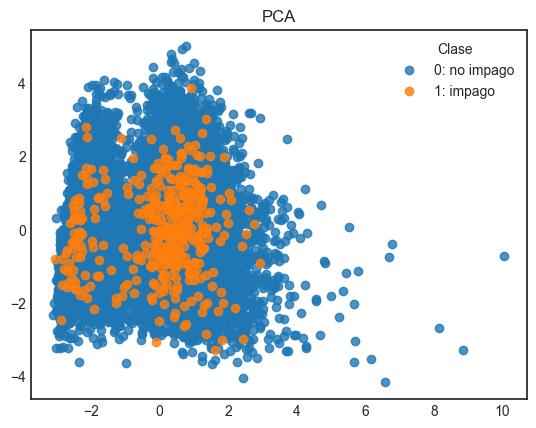

TSNE            TSNE1      TSNE2
0      62.381702   4.769782
1     -14.932183  35.598423
2      56.515907   9.749430
3      14.999878  64.648285
4     -49.267860   5.521664
...          ...        ...
23371   2.948168 -16.871803
23372 -88.334183 -19.508732
23373  -0.623504  41.180588
23374  15.597688  34.967484
23375  51.037132  47.307297

[23376 rows x 2 columns]


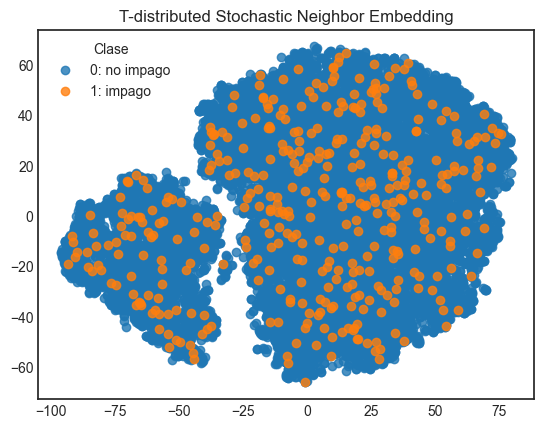

Components analysis           Pago  Domiciliacion  Anyomatricula     Prima     Valor  \
PCA1 -0.092246       0.040363      -0.022232  0.545284 -0.016954   
PCA2  0.043684      -0.025561      -0.242888 -0.132495 -0.292673   

      ValorVehículo   Motor_2   Motor_3     Canal   Socioec  ...   Figuras  \
PCA1       0.755395  0.180063  0.004114 -0.025164  0.058429  ...  0.002104   
PCA2       0.126707  0.044573 -0.000515  0.107023 -0.527725  ...  0.028235   

      Tipo_Moto  Tipo_Turismo  Zonas_Zona2  Zonas_Zona3  Zonas_Zona4  \
PCA1  -0.211426      0.176634    -0.015864    -0.006385     0.002938   
PCA2  -0.067727      0.035412    -0.062027     0.035076     0.008379   

      Zonas_Zona5  Zonas_Zona6  Zonas_Zona7  Zonas_Zona8  
PCA1     0.026169     0.001396     0.000327     0.001862  
PCA2    -0.017429    -0.000441     0.004090     0.000483  

[2 rows x 23 columns]
Explained variance ratio for first two components:  [0.23875457 0.16665408]
Sum of explained variance ratio for first two c

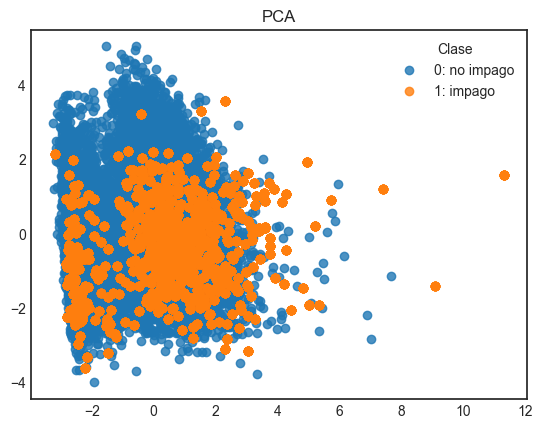

TSNE            TSNE1      TSNE2
0      81.860794   8.060247
1     -36.637844  38.276897
2      66.545906   2.784023
3     -28.886431  22.651451
4     -61.505768  11.067587
...          ...        ...
34028  51.247803  25.222757
34029  -6.838044 -64.410759
34030 -48.611088   6.258601
34031  95.644852  17.759783
34032  41.693863 -32.586067

[34033 rows x 2 columns]


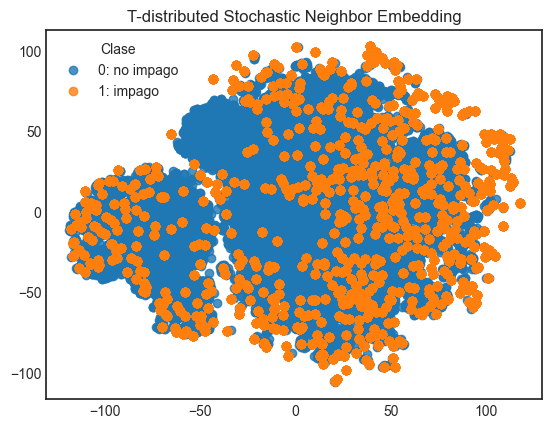

Components analysis           Pago  Domiciliacion  Anyomatricula     Prima     Valor  \
PCA1 -0.112647       0.040240      -0.043952  0.545964 -0.019113   
PCA2  0.052693      -0.022684      -0.231267 -0.131786 -0.274815   

      ValorVehículo   Motor_2   Motor_3     Canal   Socioec  ...   Figuras  \
PCA1        0.73923  0.200504  0.003650 -0.034177  0.054791  ... -0.003113   
PCA2        0.12786  0.042112 -0.000494  0.116558 -0.514876  ...  0.034979   

      Tipo_Moto  Tipo_Turismo  Zonas_Zona2  Zonas_Zona3  Zonas_Zona4  \
PCA1  -0.218742      0.191990    -0.012862    -0.000337     0.004070   
PCA2  -0.070227      0.032765    -0.067165     0.031911     0.007212   

      Zonas_Zona5  Zonas_Zona6  Zonas_Zona7  Zonas_Zona8  
PCA1     0.037985     0.003092     0.000693     0.002072  
PCA2    -0.020620    -0.000597     0.004312     0.000279  

[2 rows x 23 columns]
Explained variance ratio for first two components:  [0.23990976 0.16836962]
Sum of explained variance ratio for first two c

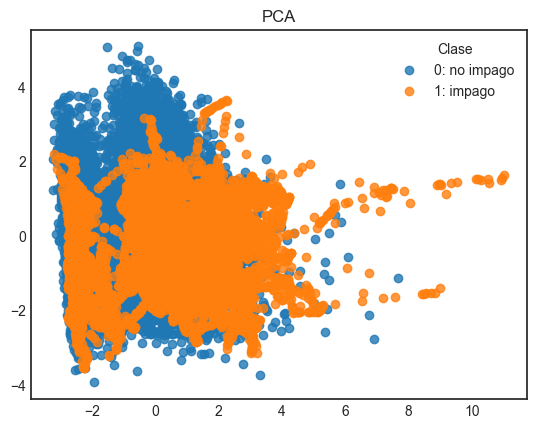

TSNE            TSNE1      TSNE2
0      73.307663  17.391560
1     -37.903809  31.116884
2      63.084667  14.482913
3     -35.133530  16.567150
4     -50.181519   1.368117
...          ...        ...
34028  25.654793 -37.849033
34029  90.630844  39.999748
34030  84.330894 -32.406200
34031  53.047100 -40.235332
34032 -20.467302  81.734161

[34033 rows x 2 columns]


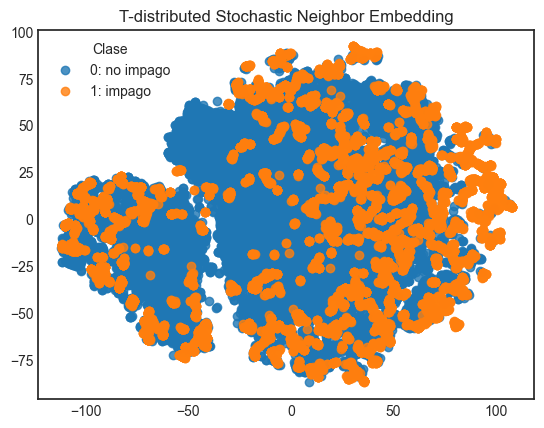

Components analysis           Pago  Domiciliacion  Anyomatricula     Prima     Valor  \
PCA1 -0.123096       0.047016      -0.046652  0.591740 -0.039979   
PCA2  0.044493      -0.020177      -0.250767 -0.093985 -0.289145   

      ValorVehículo   Motor_2   Motor_3     Canal   Socioec  ...   Figuras  \
PCA1       0.685988  0.206312  0.002233 -0.027794  0.092875  ... -0.007542   
PCA2       0.148711  0.055819 -0.000848  0.117936 -0.501712  ...  0.034505   

      Tipo_Moto  Tipo_Turismo  Zonas_Zona2  Zonas_Zona3  Zonas_Zona4  \
PCA1  -0.232875      0.202425    -0.014807     0.000154     0.003877   
PCA2  -0.083553      0.043057    -0.071322     0.032472     0.006814   

      Zonas_Zona5  Zonas_Zona6  Zonas_Zona7  Zonas_Zona8  
PCA1     0.035880     0.002113     0.000303     0.002924  
PCA2    -0.020569     0.000163     0.005329     0.000483  

[2 rows x 23 columns]
Explained variance ratio for first two components:  [0.22681492 0.17307456]
Sum of explained variance ratio for first two c

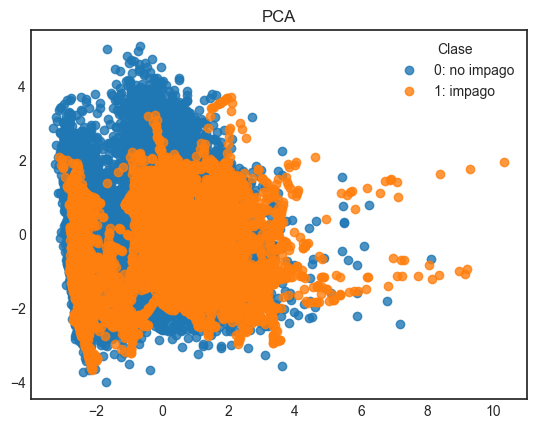

TSNE            TSNE1      TSNE2
0      71.555748  35.245102
1     -37.256332  30.525661
2      72.239479  14.968561
3     -29.713526  18.087454
4     -55.126869   5.081924
...          ...        ...
34183  65.039268 -44.341873
34184  69.703308 -22.470032
34185  69.805885 -22.344549
34186  69.779785 -22.377136
34187  67.513474 -43.063396

[34188 rows x 2 columns]


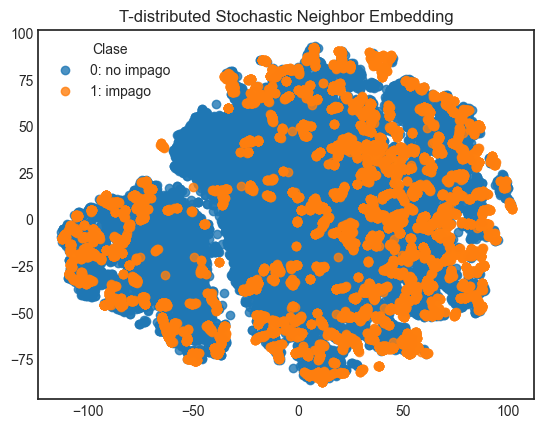

Components analysis           Pago  Domiciliacion  Anyomatricula     Prima     Valor  \
PCA1 -0.126888       0.045821      -0.026426  0.589560  0.000770   
PCA2  0.040648      -0.008012      -0.201794 -0.070169 -0.256142   

      ValorVehículo   Motor_2   Motor_3     Canal   Socioec  ...   Figuras  \
PCA1       0.693077  0.204056  0.001579 -0.055142  0.090182  ... -0.013841   
PCA2       0.179778  0.057119 -0.000262  0.118823 -0.532112  ...  0.037715   

      Tipo_Moto  Tipo_Turismo  Zonas_Zona2  Zonas_Zona3  Zonas_Zona4  \
PCA1  -0.214102      0.192129    -0.002432    -0.001716     0.002279   
PCA2  -0.090607      0.050611    -0.069052     0.037774     0.006314   

      Zonas_Zona5  Zonas_Zona6  Zonas_Zona7  Zonas_Zona8  
PCA1     0.037720     0.002952     0.000022     0.001506  
PCA2    -0.018058    -0.000082     0.002360     0.000794  

[2 rows x 23 columns]
Explained variance ratio for first two components:  [0.23831179 0.17136697]
Sum of explained variance ratio for first two c

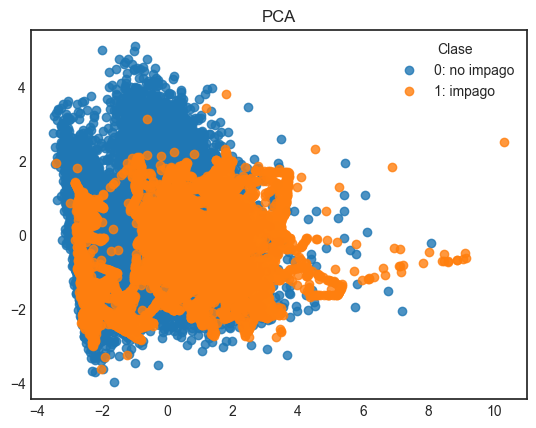

TSNE            TSNE1      TSNE2
0      56.702156  23.633774
1     -29.329447  34.484810
2      49.492779   9.809182
3     -27.688648  15.818602
4     -55.383709  -0.978561
...          ...        ...
34028 -64.843628  17.543232
34029  45.010147 -11.841213
34030  96.813744  26.968746
34031  25.442099  -3.202453
34032   0.036961 -68.437180

[34033 rows x 2 columns]


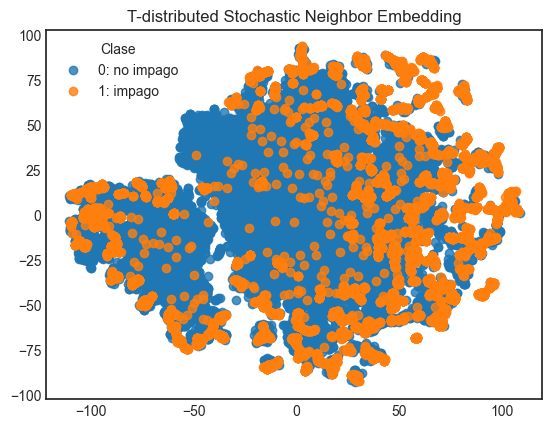

Components analysis           Pago  Domiciliacion  Anyomatricula     Prima     Valor  \
PCA1 -0.029473       0.002278       0.040238  0.226412 -0.026360   
PCA2 -0.073703       0.018991       0.085078  0.261957  0.150869   

      ValorVehículo   Motor_2   Motor_3     Canal   Socioec  ...   Figuras  \
PCA1       0.953238  0.099466  0.019129 -0.005947 -0.016892  ...  0.012287   
PCA2      -0.034062  0.011383 -0.001119 -0.083909  0.618588  ... -0.044868   

      Tipo_Moto  Tipo_Turismo  Zonas_Zona2  Zonas_Zona3  Zonas_Zona4  \
PCA1  -0.087724      0.088319    -0.011763    -0.003379     0.010556   
PCA2   0.007701      0.013036     0.038743    -0.024545    -0.006742   

      Zonas_Zona5  Zonas_Zona6  Zonas_Zona7  Zonas_Zona8  
PCA1      0.03661     0.001382     0.003810    -0.001772  
PCA2      0.01371     0.005518    -0.000742     0.001143  

[2 rows x 23 columns]
Explained variance ratio for first two components:  [0.42477784 0.11733256]
Sum of explained variance ratio for first two c

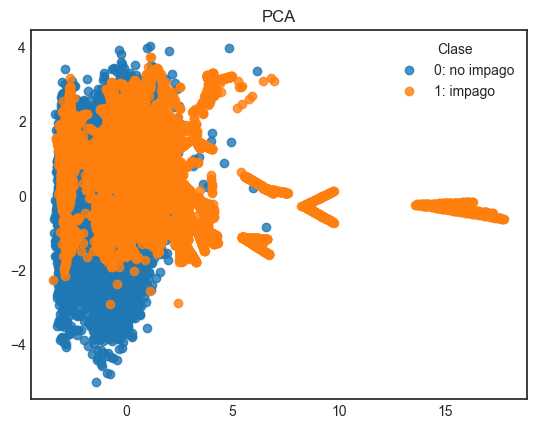

TSNE             TSNE1      TSNE2
0       43.867031  15.372794
1      -26.742750 -35.825348
2       40.643082   2.427945
3      -26.291552 -21.821730
4      -61.542488 -23.628313
...           ...        ...
34028  109.240105  17.300112
34029   36.986145  92.604340
34030   56.591438 -72.159111
34031   -6.356863 -96.561790
34032   87.977531 -12.151883

[34033 rows x 2 columns]


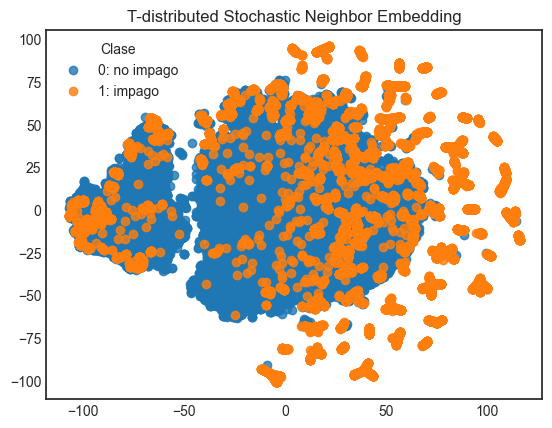

In [5]:
from src.model_utils.dim_reduction import tsne_2d, pca_2d

# Generamos los gráficos de PCA para los diferentes tipos de oversampling
# Generamos los gráficos de PCA para los diferentes tipos de oversampling
pca_2d(X_train, y_train)
tsne_2d(X_train, y_train)

pca_2d(X_train_ro, y_train_ro)
tsne_2d(X_train_ro, y_train_ro)

pca_2d(X_train_sm, y_train_sm)
tsne_2d(X_train_sm, y_train_sm)

pca_2d(X_train_adasyn, y_train_adasyn)
tsne_2d(X_train_adasyn, y_train_adasyn)

pca_2d(X_train_bsm, y_train_bsm)
tsne_2d(X_train_bsm, y_train_bsm)

pca_2d(X_train_svmsm, y_train_svmsm)
tsne_2d(X_train_svmsm, y_train_svmsm)




A continuación vamos a entrenar los modelos y evaluarlos con los diferentes conjuntos oversampleados

Accuracy (train): 0.8635
Accuracy (test) : 0.8683

Generando matriz de confusión para LogisticRegression:



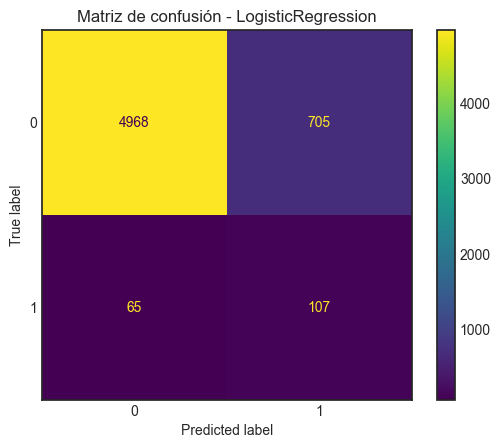


Generando classification report para LogisticRegression:

              precision    recall  f1-score   support

           0     0.9871    0.8757    0.9281      5673
           1     0.1318    0.6221    0.2175       172

    accuracy                         0.8683      5845
   macro avg     0.5594    0.7489    0.5728      5845
weighted avg     0.9619    0.8683    0.9072      5845

AUC-ROC (train): 0.8361
AUC-ROC (test) : 0.8357
PR-AUC  (train): 0.2453
PR-AUC  (test) : 0.3114
{'threshold': 0.6492088689589521, 'val_precision_at_threshold': 0.12957317073170732, 'val_recall_at_threshold': 0.6204379562043796, 'sampler': None}
Accuracy (train): 0.8490
Accuracy (test) : 0.8536

Generando matriz de confusión para LogisticRegression:



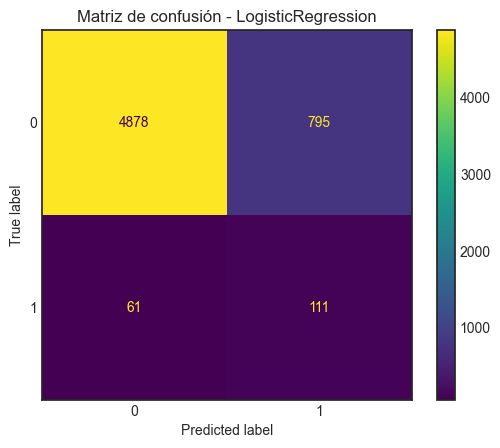


Generando classification report para LogisticRegression:

              precision    recall  f1-score   support

           0     0.9876    0.8599    0.9193      5673
           1     0.1225    0.6453    0.2059       172

    accuracy                         0.8536      5845
   macro avg     0.5551    0.7526    0.5626      5845
weighted avg     0.9622    0.8536    0.8983      5845

AUC-ROC (train): 0.8364
AUC-ROC (test) : 0.8387
PR-AUC  (train): 0.2573
PR-AUC  (test) : 0.3284
{'threshold': 0.2641621803318534, 'val_precision_at_threshold': 0.1272475795297372, 'val_recall_at_threshold': 0.6715328467153284, 'sampler': 'ro'}
Accuracy (train): 0.8916
Accuracy (test) : 0.8970

Generando matriz de confusión para LogisticRegression:



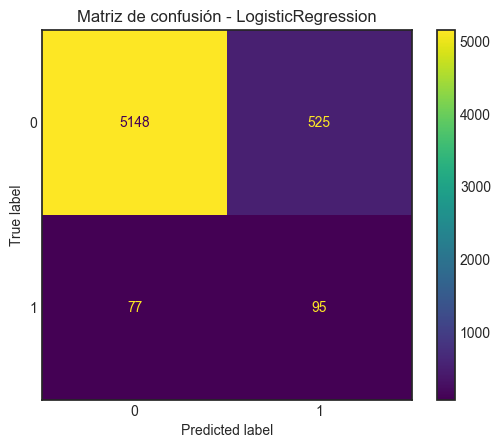


Generando classification report para LogisticRegression:

              precision    recall  f1-score   support

           0     0.9853    0.9075    0.9448      5673
           1     0.1532    0.5523    0.2399       172

    accuracy                         0.8970      5845
   macro avg     0.5692    0.7299    0.5923      5845
weighted avg     0.9608    0.8970    0.9240      5845

AUC-ROC (train): 0.8253
AUC-ROC (test) : 0.8253
PR-AUC  (train): 0.2230
PR-AUC  (test) : 0.2784
{'threshold': 0.32116745059992, 'val_precision_at_threshold': 0.13320079522862824, 'val_recall_at_threshold': 0.48905109489051096, 'sampler': 'smote'}
Accuracy (train): 0.8982
Accuracy (test) : 0.9059

Generando matriz de confusión para LogisticRegression:



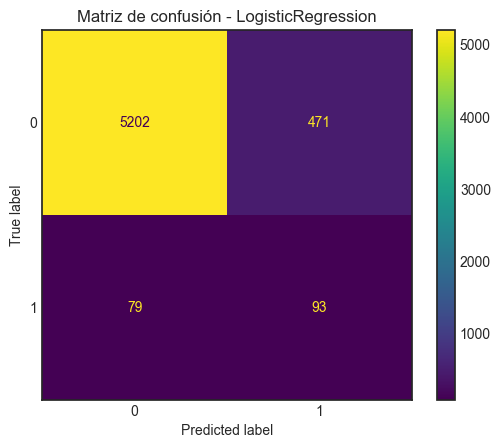


Generando classification report para LogisticRegression:

              precision    recall  f1-score   support

           0     0.9850    0.9170    0.9498      5673
           1     0.1649    0.5407    0.2527       172

    accuracy                         0.9059      5845
   macro avg     0.5750    0.7288    0.6013      5845
weighted avg     0.9609    0.9059    0.9293      5845

AUC-ROC (train): 0.8325
AUC-ROC (test) : 0.8366
PR-AUC  (train): 0.2411
PR-AUC  (test) : 0.2888
{'threshold': 0.3260925219461935, 'val_precision_at_threshold': 0.15192743764172337, 'val_recall_at_threshold': 0.48905109489051096, 'sampler': 'b_smote'}
Accuracy (train): 0.9029
Accuracy (test) : 0.9093

Generando matriz de confusión para LogisticRegression:



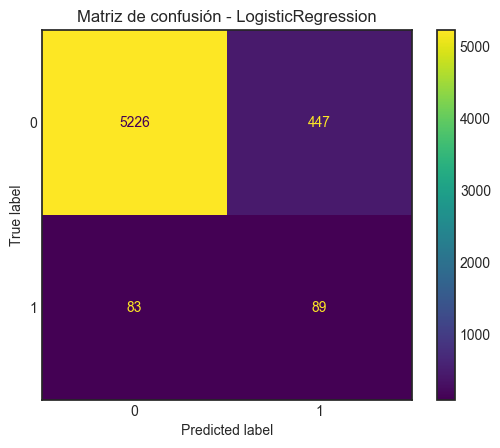


Generando classification report para LogisticRegression:

              precision    recall  f1-score   support

           0     0.9844    0.9212    0.9517      5673
           1     0.1660    0.5174    0.2514       172

    accuracy                         0.9093      5845
   macro avg     0.5752    0.7193    0.6016      5845
weighted avg     0.9603    0.9093    0.9311      5845

AUC-ROC (train): 0.8300
AUC-ROC (test) : 0.8321
PR-AUC  (train): 0.2604
PR-AUC  (test) : 0.3364
{'threshold': 0.2583369532622122, 'val_precision_at_threshold': 0.15862068965517243, 'val_recall_at_threshold': 0.5036496350364964, 'sampler': 'svm_smote'}
Accuracy (train): 0.8964
Accuracy (test) : 0.9008

Generando matriz de confusión para LogisticRegression:



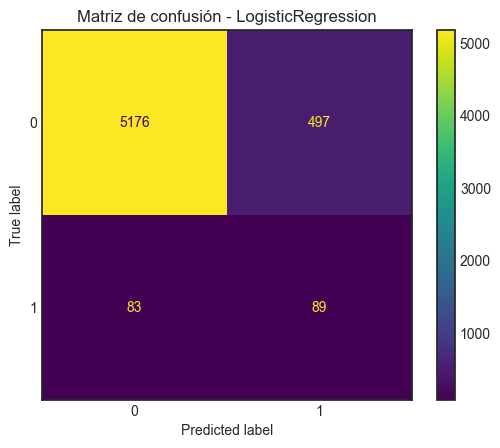


Generando classification report para LogisticRegression:

              precision    recall  f1-score   support

           0     0.9842    0.9124    0.9469      5673
           1     0.1519    0.5174    0.2348       172

    accuracy                         0.9008      5845
   macro avg     0.5680    0.7149    0.5909      5845
weighted avg     0.9597    0.9008    0.9260      5845

AUC-ROC (train): 0.8255
AUC-ROC (test) : 0.8257
PR-AUC  (train): 0.2182
PR-AUC  (test) : 0.2701
{'threshold': 0.33156525526548364, 'val_precision_at_threshold': 0.13457556935817805, 'val_recall_at_threshold': 0.4744525547445255, 'sampler': 'adasyn'}


In [3]:
from src.model_utils.mod_evaluation import run_model_and_evaluate_reg_log, run_model_and_evaluate_reg_log2
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')


rf_metrics, roc_auc_dict, fp_id, fn_id, extra = run_model_and_evaluate_reg_log2(
    X_train, y_train, X_test, y_test, 'lbfgs', None, None, 'balanced'
)
print(extra)

rf_metrics, roc_auc_dict, fp_id, fn_id, extra = run_model_and_evaluate_reg_log2(
    X_train, y_train, X_test, y_test, 'lbfgs', 'ro'
)
print(extra)

rf_metrics, roc_auc_dict, fp_id, fn_id, extra = run_model_and_evaluate_reg_log2(
    X_train, y_train, X_test, y_test, 'lbfgs', 'smote'
)
print(extra)

rf_metrics, roc_auc_dict, fp_id, fn_id, extra = run_model_and_evaluate_reg_log2(
    X_train, y_train, X_test, y_test, 'lbfgs', 'b_smote'
)
print(extra)

rf_metrics, roc_auc_dict, fp_id, fn_id, extra = run_model_and_evaluate_reg_log2(
    X_train, y_train, X_test, y_test, 'lbfgs', 'svm_smote'
)
print(extra)

rf_metrics, roc_auc_dict, fp_id, fn_id, extra = run_model_and_evaluate_reg_log2(
    X_train, y_train, X_test, y_test, 'lbfgs', 'adasyn'
)
print(extra)




Accuracy (train): 0.7218
Accuracy (test) : 0.7314

Generando matriz de confusión para LogisticRegresion:



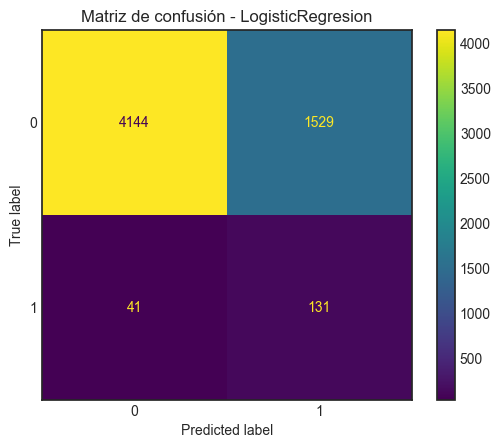


Generando classification report para LogisticRegresion:

              precision    recall  f1-score   support

           0     0.9902    0.7305    0.8407      5673
           1     0.0789    0.7616    0.1430       172

    accuracy                         0.7314      5845
   macro avg     0.5346    0.7461    0.4919      5845
weighted avg     0.9634    0.7314    0.8202      5845

AUC-ROC (train): 0.8361
AUC-ROC (test) : 0.8356
PR-AUC  (train): 0.2452
PR-AUC  (test) : 0.3113
Accuracy (train): 0.8337
Accuracy (test) : 0.9393

Generando matriz de confusión para LogisticRegresion:



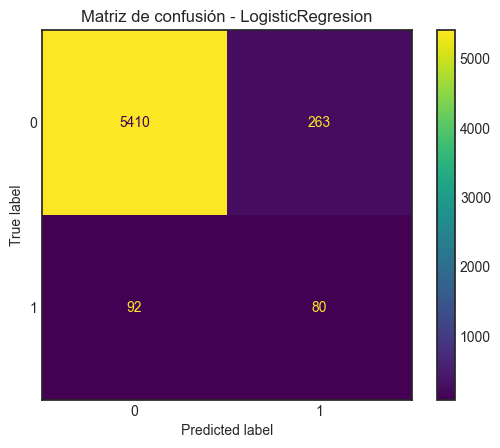


Generando classification report para LogisticRegresion:

              precision    recall  f1-score   support

           0     0.9833    0.9536    0.9682      5673
           1     0.2332    0.4651    0.3107       172

    accuracy                         0.9393      5845
   macro avg     0.6083    0.7094    0.6395      5845
weighted avg     0.9612    0.9393    0.9489      5845

AUC-ROC (train): 0.8401
AUC-ROC (test) : 0.8387
PR-AUC  (train): 0.6666
PR-AUC  (test) : 0.3255
Accuracy (train): 0.8335
Accuracy (test) : 0.9032

Generando matriz de confusión para LogisticRegresion:



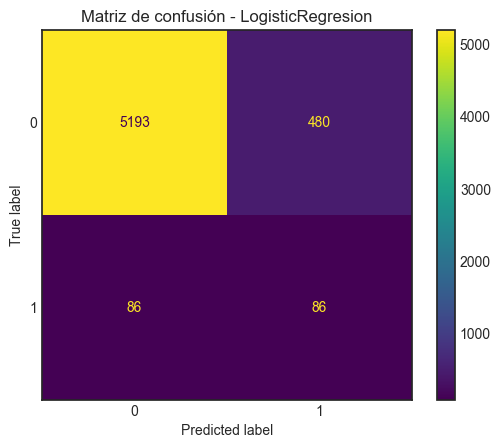


Generando classification report para LogisticRegresion:

              precision    recall  f1-score   support

           0     0.9837    0.9154    0.9483      5673
           1     0.1519    0.5000    0.2331       172

    accuracy                         0.9032      5845
   macro avg     0.5678    0.7077    0.5907      5845
weighted avg     0.9592    0.9032    0.9273      5845

AUC-ROC (train): 0.8842
AUC-ROC (test) : 0.8241
PR-AUC  (train): 0.7777
PR-AUC  (test) : 0.2652
Accuracy (train): 0.8261
Accuracy (test) : 0.8977

Generando matriz de confusión para LogisticRegresion:



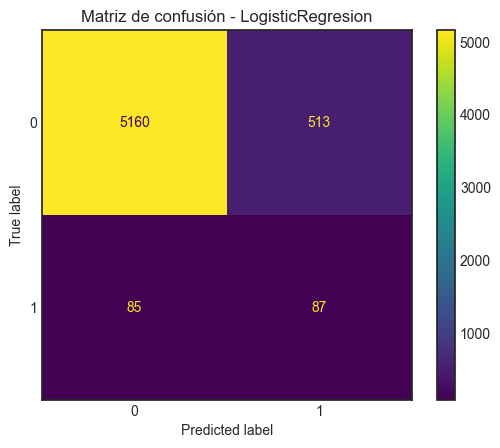


Generando classification report para LogisticRegresion:

              precision    recall  f1-score   support

           0     0.9838    0.9096    0.9452      5673
           1     0.1450    0.5058    0.2254       172

    accuracy                         0.8977      5845
   macro avg     0.5644    0.7077    0.5853      5845
weighted avg     0.9591    0.8977    0.9240      5845

AUC-ROC (train): 0.8756
AUC-ROC (test) : 0.8226
PR-AUC  (train): 0.7534
PR-AUC  (test) : 0.2557
Accuracy (train): 0.8599
Accuracy (test) : 0.9095

Generando matriz de confusión para LogisticRegresion:



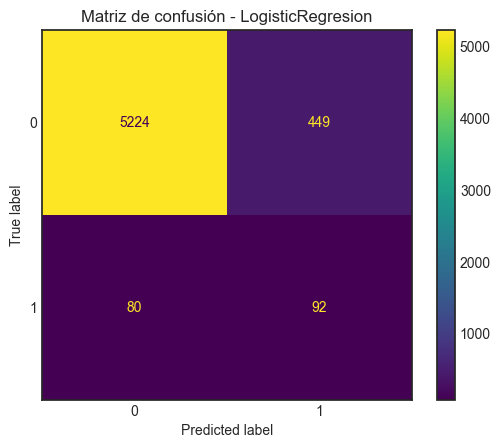


Generando classification report para LogisticRegresion:

              precision    recall  f1-score   support

           0     0.9849    0.9209    0.9518      5673
           1     0.1701    0.5349    0.2581       172

    accuracy                         0.9095      5845
   macro avg     0.5775    0.7279    0.6049      5845
weighted avg     0.9609    0.9095    0.9314      5845

AUC-ROC (train): 0.9171
AUC-ROC (test) : 0.8360
PR-AUC  (train): 0.8278
PR-AUC  (test) : 0.2755
Accuracy (train): 0.8921
Accuracy (test) : 0.9370

Generando matriz de confusión para LogisticRegresion:



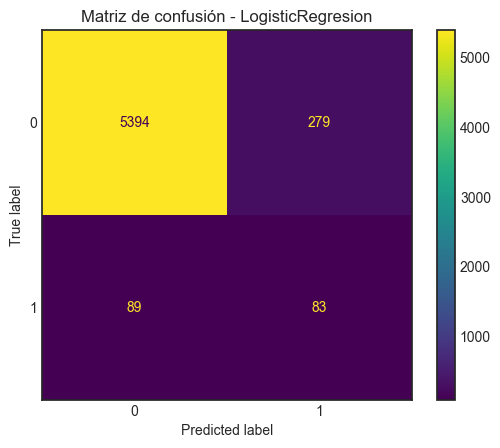


Generando classification report para LogisticRegresion:

              precision    recall  f1-score   support

           0     0.9838    0.9508    0.9670      5673
           1     0.2293    0.4826    0.3109       172

    accuracy                         0.9370      5845
   macro avg     0.6065    0.7167    0.6389      5845
weighted avg     0.9616    0.9370    0.9477      5845

AUC-ROC (train): 0.9452
AUC-ROC (test) : 0.8326
PR-AUC  (train): 0.9027
PR-AUC  (test) : 0.3251


In [9]:
from src.model_utils.mod_evaluation import run_model_and_evaluate_reg_log
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')


rf_metrics, roc_auc_dict, fp_id, fn_id = run_model_and_evaluate_reg_log(
    X_train, y_train, X_test, y_test, "newton-cg", "balanced")

rf_metrics, roc_auc_dict, fp_id, fn_id = run_model_and_evaluate_reg_log( X_train_ro, y_train_ro,X_test, y_test, "newton-cg"
)

rf_metrics, roc_auc_dict, fp_id, fn_id = run_model_and_evaluate_reg_log( X_train_sm,        y_train_sm, X_test, y_test, "newton-cg"
)

rf_metrics, roc_auc_dict, fp_id, fn_id = run_model_and_evaluate_reg_log(X_train_adasyn,     y_train_adasyn, X_test, y_test, "newton-cg"
)

rf_metrics, roc_auc_dict, fp_id, fn_id = run_model_and_evaluate_reg_log(X_train_bsm,        y_train_bsm, X_test, y_test, "newton-cg"
)

rf_metrics, roc_auc_dict, fp_id, fn_id= run_model_and_evaluate_reg_log(X_train_svmsm,       y_train_svmsm, X_test, y_test, "newton-cg"
)


Accuracy (train): 0.7217
Accuracy (test) : 0.7314

Generando matriz de confusión para LogisticRegresion:



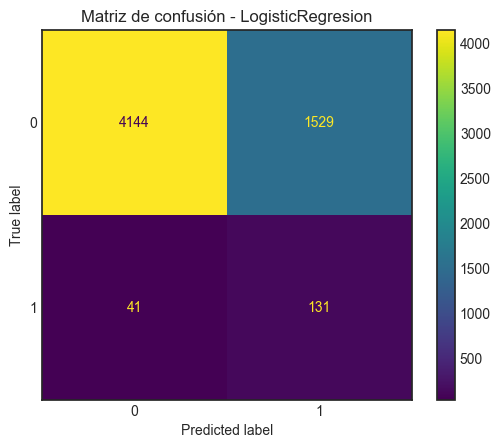


Generando classification report para LogisticRegresion:

              precision    recall  f1-score   support

           0     0.9902    0.7305    0.8407      5673
           1     0.0789    0.7616    0.1430       172

    accuracy                         0.7314      5845
   macro avg     0.5346    0.7461    0.4919      5845
weighted avg     0.9634    0.7314    0.8202      5845

AUC-ROC (train): 0.8361
AUC-ROC (test) : 0.8356
PR-AUC  (train): 0.2452
PR-AUC  (test) : 0.3113
Accuracy (train): 0.7882
Accuracy (test) : 0.8806

Generando matriz de confusión para LogisticRegresion:



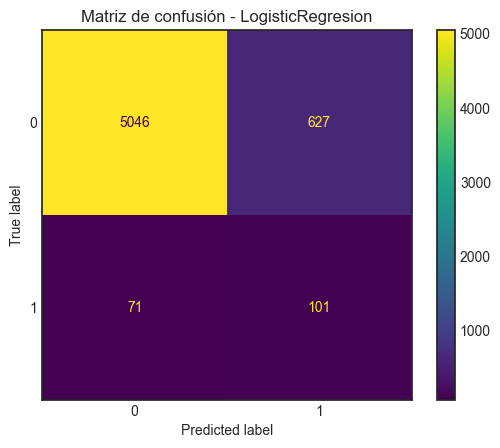


Generando classification report para LogisticRegresion:

              precision    recall  f1-score   support

           0     0.9861    0.8895    0.9353      5673
           1     0.1387    0.5872    0.2244       172

    accuracy                         0.8806      5845
   macro avg     0.5624    0.7383    0.5799      5845
weighted avg     0.9612    0.8806    0.9144      5845

AUC-ROC (train): 0.8391
AUC-ROC (test) : 0.8366
PR-AUC  (train): 0.7482
PR-AUC  (test) : 0.3192
Accuracy (train): 0.8239
Accuracy (test) : 0.8814

Generando matriz de confusión para LogisticRegresion:



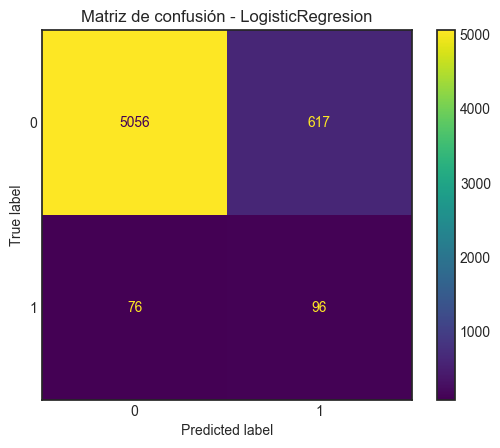


Generando classification report para LogisticRegresion:

              precision    recall  f1-score   support

           0     0.9852    0.8912    0.9359      5673
           1     0.1346    0.5581    0.2169       172

    accuracy                         0.8814      5845
   macro avg     0.5599    0.7247    0.5764      5845
weighted avg     0.9602    0.8814    0.9147      5845

AUC-ROC (train): 0.8847
AUC-ROC (test) : 0.8232
PR-AUC  (train): 0.8081
PR-AUC  (test) : 0.2611
Accuracy (train): 0.8140
Accuracy (test) : 0.8724

Generando matriz de confusión para LogisticRegresion:



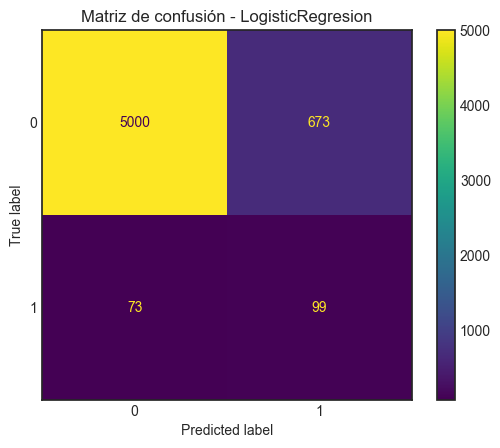


Generando classification report para LogisticRegresion:

              precision    recall  f1-score   support

           0     0.9856    0.8814    0.9306      5673
           1     0.1282    0.5756    0.2097       172

    accuracy                         0.8724      5845
   macro avg     0.5569    0.7285    0.5702      5845
weighted avg     0.9604    0.8724    0.9094      5845

AUC-ROC (train): 0.8770
AUC-ROC (test) : 0.8219
PR-AUC  (train): 0.7894
PR-AUC  (test) : 0.2529
Accuracy (train): 0.8524
Accuracy (test) : 0.8927

Generando matriz de confusión para LogisticRegresion:



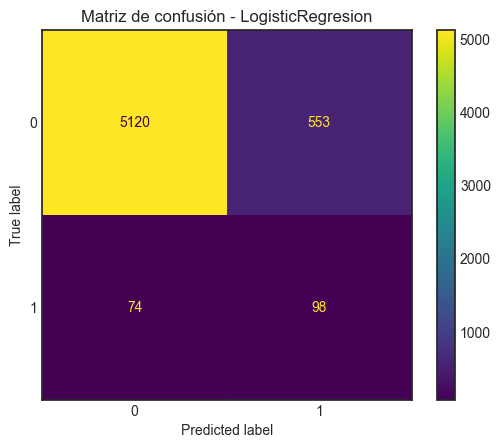


Generando classification report para LogisticRegresion:

              precision    recall  f1-score   support

           0     0.9858    0.9025    0.9423      5673
           1     0.1505    0.5698    0.2382       172

    accuracy                         0.8927      5845
   macro avg     0.5681    0.7361    0.5902      5845
weighted avg     0.9612    0.8927    0.9216      5845

AUC-ROC (train): 0.9190
AUC-ROC (test) : 0.8357
PR-AUC  (train): 0.8551
PR-AUC  (test) : 0.2729
Accuracy (train): 0.8855
Accuracy (test) : 0.9234

Generando matriz de confusión para LogisticRegresion:



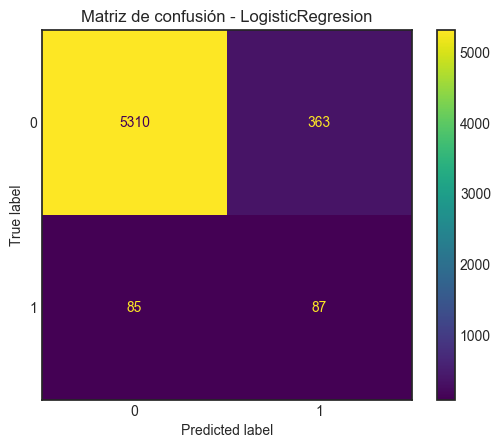


Generando classification report para LogisticRegresion:

              precision    recall  f1-score   support

           0     0.9842    0.9360    0.9595      5673
           1     0.1933    0.5058    0.2797       172

    accuracy                         0.9234      5845
   macro avg     0.5888    0.7209    0.6196      5845
weighted avg     0.9610    0.9234    0.9395      5845

AUC-ROC (train): 0.9473
AUC-ROC (test) : 0.8326
PR-AUC  (train): 0.9191
PR-AUC  (test) : 0.3195


In [8]:
from src.model_utils.mod_evaluation import run_model_and_evaluate_reg_log
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')


rf_metrics, roc_auc_dict, fp_id, fn_id = run_model_and_evaluate_reg_log(
    X_train, y_train, X_test, y_test, "newton-cholesky", "balanced")

rf_metrics, roc_auc_dict, fp_id, fn_id = run_model_and_evaluate_reg_log( X_train_ro, y_train_ro, X_test, y_test, "newton-cholesky"
)
rf_metrics, roc_auc_dict, fp_id, fn_id = run_model_and_evaluate_reg_log( X_train_sm,        y_train_sm, X_test, y_test, "newton-cholesky"
)

rf_metrics, roc_auc_dict, fp_id, fn_id = run_model_and_evaluate_reg_log(X_train_adasyn,     y_train_adasyn, X_test, y_test, "newton-cholesky"
)

rf_metrics, roc_auc_dict, fp_id, fn_id = run_model_and_evaluate_reg_log(X_train_bsm,        y_train_bsm, X_test, y_test, "newton-cholesky"
)

rf_metrics, roc_auc_dict, fp_id, fn_id= run_model_and_evaluate_reg_log(X_train_svmsm,       y_train_svmsm, X_test, y_test, "newton-cholesky"
)


Vamos a probar estos modelos y a evaluarlos pero utilizando Boruta para la selección de variables

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	3
Rejected: 	20
Iteration: 	7 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	20
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	20
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	20
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	20
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	20
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	20
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	20
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	20
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	20
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	20
I

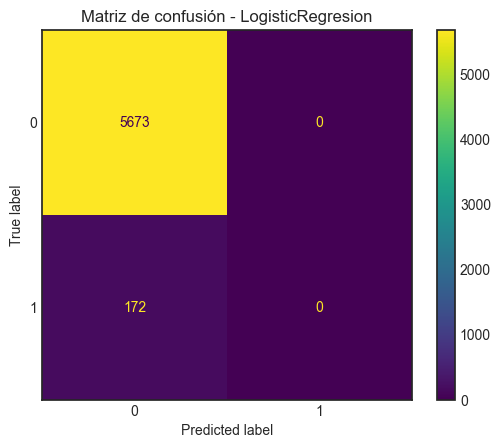


Generando classification report para LogisticRegresion:

              precision    recall  f1-score   support

           0     0.9706    1.0000    0.9851      5673
           1     0.0000    0.0000    0.0000       172

    accuracy                         0.9706      5845
   macro avg     0.4853    0.5000    0.4925      5845
weighted avg     0.9420    0.9706    0.9561      5845

AUC-ROC (train): 0.7987
AUC-ROC (test) : 0.8048
PR-AUC  (train): 0.2686
PR-AUC  (test) : 0.3226


D:\develop\predict_lapse\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\develop\predict_lapse\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\develop\predict_lapse\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\develop

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	14
Iteration: 	7 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	14
Iteration: 	8 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	14
Iteration: 	9 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	14
Iteration: 	10 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	14
Iteration: 	11 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	14
Iteration: 	12 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	14
Iteration: 	13 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	14
Iteration: 	14 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	14
Iteration: 	15 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	14
Iteration: 	16 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	14
I

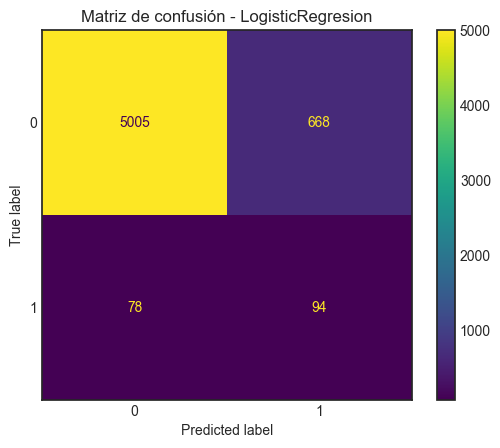


Generando classification report para LogisticRegresion:

              precision    recall  f1-score   support

           0     0.9847    0.8822    0.9306      5673
           1     0.1234    0.5465    0.2013       172

    accuracy                         0.8724      5845
   macro avg     0.5540    0.7144    0.5660      5845
weighted avg     0.9593    0.8724    0.9092      5845

AUC-ROC (train): 0.8229
AUC-ROC (test) : 0.8262
PR-AUC  (train): 0.7243
PR-AUC  (test) : 0.2749
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	9
Tentative: 	0
Rejected: 	14


BorutaPy finished running.

Iteration: 	7 / 100
Confirmed: 	9
Tentative: 	0
Rejected: 	14
Las variables seleccionadas con Boruta son: Index(['Any

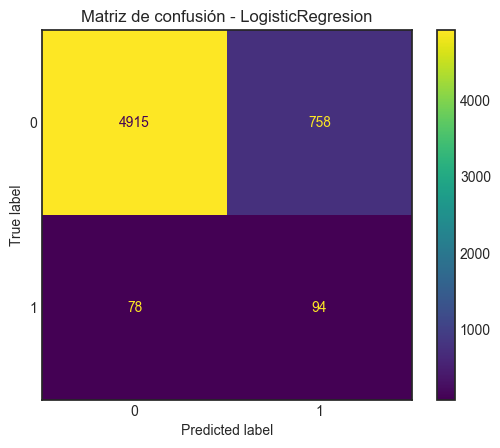


Generando classification report para LogisticRegresion:

              precision    recall  f1-score   support

           0     0.9844    0.8664    0.9216      5673
           1     0.1103    0.5465    0.1836       172

    accuracy                         0.8570      5845
   macro avg     0.5474    0.7064    0.5526      5845
weighted avg     0.9587    0.8570    0.8999      5845

AUC-ROC (train): 0.8546
AUC-ROC (test) : 0.8197
PR-AUC  (train): 0.7600
PR-AUC  (test) : 0.2786
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	9
Tentative: 	0
Rejected: 	14


BorutaPy finished running.

Iteration: 	7 / 100
Confirmed: 	9
Tentative: 	0
Rejected: 	14
Las variables seleccionadas con Boruta son: Index(['Any

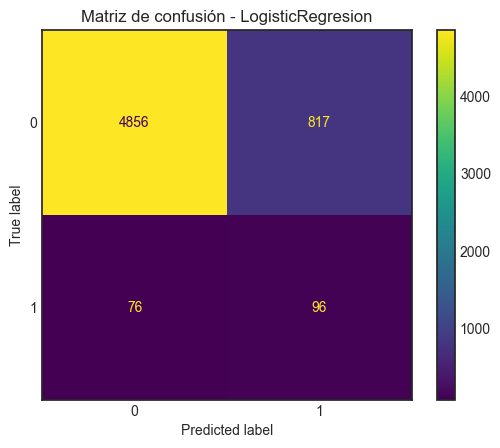


Generando classification report para LogisticRegresion:

              precision    recall  f1-score   support

           0     0.9846    0.8560    0.9158      5673
           1     0.1051    0.5581    0.1770       172

    accuracy                         0.8472      5845
   macro avg     0.5449    0.7071    0.5464      5845
weighted avg     0.9587    0.8472    0.8941      5845

AUC-ROC (train): 0.8468
AUC-ROC (test) : 0.8154
PR-AUC  (train): 0.7431
PR-AUC  (test) : 0.2545
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	11
Iteration: 	7 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	11
Iteration: 	8 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	11
Iteration: 	9 / 100


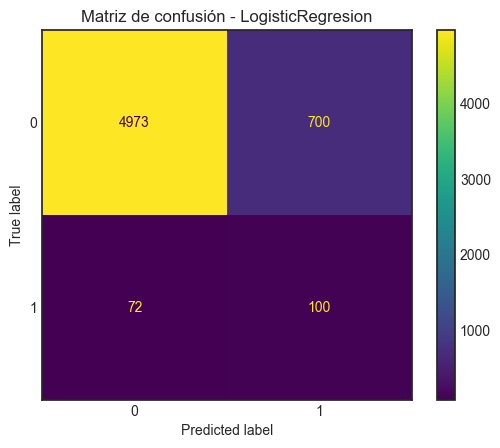


Generando classification report para LogisticRegresion:

              precision    recall  f1-score   support

           0     0.9857    0.8766    0.9280      5673
           1     0.1250    0.5814    0.2058       172

    accuracy                         0.8679      5845
   macro avg     0.5554    0.7290    0.5669      5845
weighted avg     0.9604    0.8679    0.9067      5845

AUC-ROC (train): 0.8964
AUC-ROC (test) : 0.8279
PR-AUC  (train): 0.8150
PR-AUC  (test) : 0.2491
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	11
Tentative: 	0
Rejected: 	12


BorutaPy finished running.

Iteration: 	7 / 100
Confirmed: 	11
Tentative: 	0
Rejected: 	12
Las variables seleccionadas con Boruta son: Index(['A

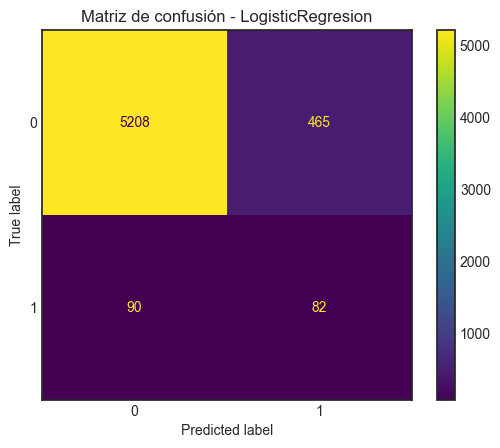


Generando classification report para LogisticRegresion:

              precision    recall  f1-score   support

           0     0.9830    0.9180    0.9494      5673
           1     0.1499    0.4767    0.2281       172

    accuracy                         0.9050      5845
   macro avg     0.5665    0.6974    0.5888      5845
weighted avg     0.9585    0.9050    0.9282      5845

AUC-ROC (train): 0.9288
AUC-ROC (test) : 0.8203
PR-AUC  (train): 0.8899
PR-AUC  (test) : 0.2994


In [9]:
from src.model_utils.utils import boruta_selected_vars

X_train_selected, X_train_tentative = boruta_selected_vars(X_train, y_train)
rf_metrics, roc_auc_dict, fp_id, fn_id = run_model_and_evaluate_reg_log(
 X_train[X_train_sm_selected], y_train,
    X_test[X_train_sm_selected], y_test
)

X_train_sm_selected, X_train_sm_tentative = boruta_selected_vars(X_train_ro, y_train_ro)
rf_metrics, roc_auc_dict, fp_id, fn_id = run_model_and_evaluate_reg_log(
 X_train_ro[X_train_sm_selected], y_train_ro,
    X_test[X_train_sm_selected], y_test
)

X_train_sm_selected, X_train_sm_tentative = boruta_selected_vars(X_train_sm, y_train_sm)
rf_metrics, roc_auc_dict, fp_id, fn_id = run_model_and_evaluate_reg_log(
 X_train_sm[X_train_sm_selected], y_train_sm,
    X_test[X_train_sm_selected], y_test
)

X_train_adasyn_selected, X_train_adasyn_tentative = boruta_selected_vars(X_train_adasyn, y_train_adasyn)
rf_metrics, roc_auc_dict, fp_id, fn_id = run_model_and_evaluate_reg_log(
X_train_adasyn[X_train_adasyn_selected], y_train_adasyn,
    X_test[X_train_adasyn_selected], y_test
)

X_train_bsm_selected, X_train_bsm_tentative = boruta_selected_vars(X_train_bsm, y_train_bsm)
rf_metrics, roc_auc_dict, fp_id, fn_id = run_model_and_evaluate_reg_log(
X_train_bsm[X_train_bsm_selected], y_train_bsm,
    X_test[X_train_bsm_selected], y_test
)

X_train_svmsm_selected, X_train_svmsm_tentative = boruta_selected_vars(X_train_svmsm, y_train_svmsm)
rf_metrics, roc_auc_dict, fp_id, fn_id= run_model_and_evaluate_reg_log(
X_train_svmsm[X_train_svmsm_selected], y_train_svmsm,
    X_test[X_train_svmsm_selected], y_test
)


Observamos que el algoritmo de oversampling que mejor resultado ofrece, tanto con Boruta como sin él es BorderLine Smote.
Vamos a utilizar los datos de entrenamiento oversampleados para el restod e modelos de ensemble.

In [10]:
from src.model_utils.utils import hyperparameter_tuning
from src.model_utils.mod_evaluation import run_model_and_evaluate
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier


models = {
    "Random_Forest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "GBM_sklearn": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(random_state=42)
}


param_dist_rf = {
    'n_estimators': [500, 600],
    'max_depth': [5,8,12],  # Limitar la profundidad para evitar el sobreajuste
    'min_samples_split': [5, 10, 20],  # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [4, 8, 10],  # Número mínimo de muestras en las hojas
    'max_features': ['sqrt', 'log2', 0.3]
}

# Parámetros a optimizar para GradientBoosting
param_dist_gbm = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.03, 0.05],
    'max_depth': [2, 3, 4],
    'min_samples_split': [20, 50, 80],
    'min_samples_leaf': [10, 20, 50],
    'subsample': [0.5, 0.7, 0.8],
    "max_features": ["sqrt", "log2"]
}

n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
scale_pos_weight = n_neg / n_pos
scale_pos_weight

# Parámetros a optimizar para XGBoost
param_dist_xgb = {
    'n_estimators': [300, 400, 600],
    'learning_rate': [0.03, 0.05],
    'max_depth': [2, 3, 4],
    'subsample': [0.5, 0.7, 0.8],
    'colsample_bytree': [0.6, 0.8],
    "gamma": [1, 2, 5, 10],
    "reg_lambda": [2, 5, 10, 20],
    "reg_alpha": [0.5, 1, 2],
    "min_child_weight": [10, 20, 30, 50],
    "scale_pos_weight": [scale_pos_weight]
}

param_dist_lgbm = {
    'objetive':["binary"],
    'n_estimators': [400, 500, 600],
    'num_leaves': [15, 25, 30, 45, 63],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_split_gain' : [0.1],
    'max_depth': [4, 6, 8],
    'subsample': [0.6, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.8],
    'min_child_samples': [50, 80, 100],
    'reg_alpha': [0, 0.1, 0.5],  # Regularización L1
    'reg_lambda': [5, 10, 20]  # Regularización L2
}

param_dist_catboost = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],  # Regularización L2
    'bagging_temperature': [0, 0.5, 1]
}

# Crear un diccionario con los parámetros de búsqueda para cada modelo
param_dist = {
    "Random_Forest": param_dist_rf,
    "GBM_sklearn": param_dist_gbm,
    "XGBoost": param_dist_xgb,
    "LightGBM": param_dist_lgbm,
    "CatBoost": param_dist_catboost
}

models_not_smote = ["XGBoost", "LightGBM", "CatBoost"]
best_params_models = []

for name, model in models.items():
    if name not in models_not_smote:
        print(f"\nCalculamos selección de hiperparámetros para el modelo {name} con datos de entrenamiento con Oversampling")
        best_model, random_search, best_params =  hyperparameter_tuning(name, model, param_dist, X_train_bsm, y_train_bsm)
        best_params_models.append({name:best_params})
    else:
        print(f"\nCalculamos selección de hiperparámetros para el modelo {name} con datos de entrenamiento sin Oversampling")
        best_model, random_search, best_params =  hyperparameter_tuning(name, model, param_dist, X_train, y_train)
        best_params_models.append({name:best_params})

print("Mostramos resumen de mejores hiperparámetros")
best_params_models





Calculamos selección de hiperparámetros para el modelo Random_Forest con datos de entrenamiento con Oversampling


KeyboardInterrupt: 

Por último, ejecutamos los modelos con los mejores parámetros conseguidos.


Calculamos el modelo Random_Forest con oversampling Borderline Smote
Mejor umbral elegido ha sido: 0.4171423885287629
Accuracy (train): 0.9758
Accuracy (test) : 0.9441

Generando matriz de confusión para Random_Forest:



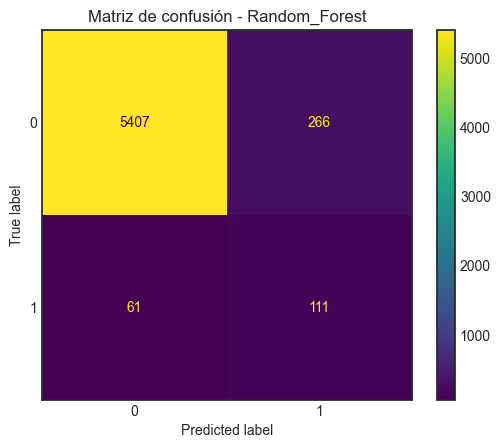


Generando classification report para Random_Forest:

              precision    recall  f1-score   support

           0     0.9888    0.9531    0.9706      5673
           1     0.2944    0.6453    0.4044       172

    accuracy                         0.9441      5845
   macro avg     0.6416    0.7992    0.6875      5845
weighted avg     0.9684    0.9441    0.9540      5845

AUC-ROC (train): 0.9653
AUC-ROC (test) : 0.8789
PR-AUC  (train): 0.6908
PR-AUC  (test) : 0.4589

Calculamos el modelo GBM_sklearn con oversampling Borderline Smote
Mejor umbral elegido ha sido: 0.6617667658877786
Accuracy (train): 0.9754
Accuracy (test) : 0.9617

Generando matriz de confusión para GBM_sklearn:



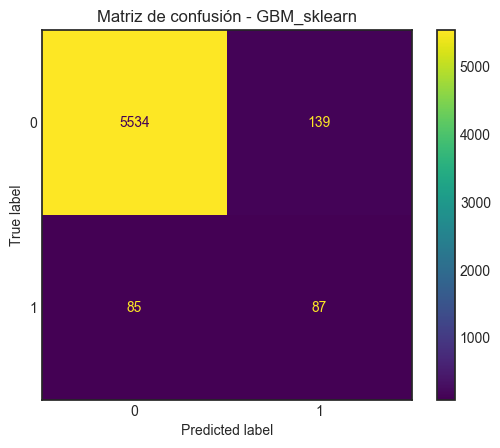


Generando classification report para GBM_sklearn:

              precision    recall  f1-score   support

           0     0.9849    0.9755    0.9802      5673
           1     0.3850    0.5058    0.4372       172

    accuracy                         0.9617      5845
   macro avg     0.6849    0.7407    0.7087      5845
weighted avg     0.9672    0.9617    0.9642      5845

AUC-ROC (train): 0.9080
AUC-ROC (test) : 0.8681
PR-AUC  (train): 0.5287
PR-AUC  (test) : 0.4917

Calculamos el modelo XGBoost sin oversampling
Mejor umbral elegido ha sido: 0.8404748439788818
Accuracy (train): 0.9715
Accuracy (test) : 0.9656

Generando matriz de confusión para XGBoost:



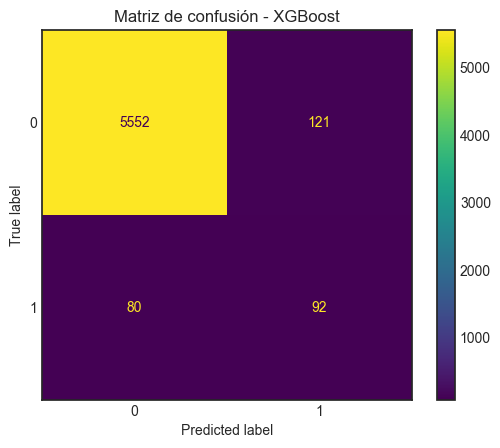


Generando classification report para XGBoost:

              precision    recall  f1-score   support

           0     0.9858    0.9787    0.9822      5673
           1     0.4319    0.5349    0.4779       172

    accuracy                         0.9656      5845
   macro avg     0.7089    0.7568    0.7301      5845
weighted avg     0.9695    0.9656    0.9674      5845

AUC-ROC (train): 0.9815
AUC-ROC (test) : 0.8803
PR-AUC  (train): 0.6898
PR-AUC  (test) : 0.4969

Calculamos el modelo LightGBM sin oversampling
[LightGBM] [Info] Number of positive: 550, number of negative: 18150
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 700
[LightGBM] [Info] Number of data points in the train set: 18700, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.029412 -> initscore=-3.496508
[LightGBM] [Info] Start training from score 

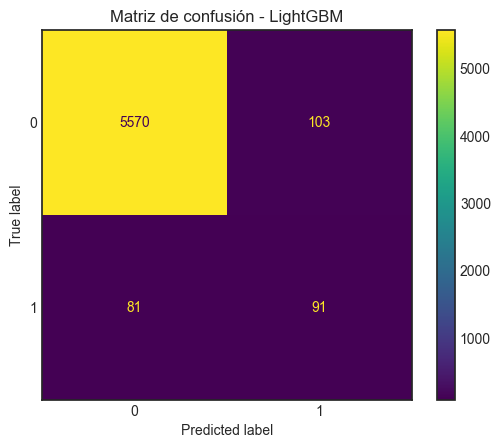


Generando classification report para LightGBM:

              precision    recall  f1-score   support

           0     0.9857    0.9818    0.9838      5673
           1     0.4691    0.5291    0.4973       172

    accuracy                         0.9685      5845
   macro avg     0.7274    0.7555    0.7405      5845
weighted avg     0.9705    0.9685    0.9694      5845

AUC-ROC (train): 0.9862
AUC-ROC (test) : 0.8900
PR-AUC  (train): 0.7262
PR-AUC  (test) : 0.5441

Calculamos el modelo CatBoost sin oversampling
0:	learn: 0.8765617	total: 116ms	remaining: 34.7s
1:	learn: 0.8773193	total: 121ms	remaining: 18.1s
2:	learn: 0.8858193	total: 127ms	remaining: 12.6s
3:	learn: 0.8873136	total: 133ms	remaining: 9.84s
4:	learn: 0.8898157	total: 138ms	remaining: 8.17s
5:	learn: 0.8939575	total: 145ms	remaining: 7.1s
6:	learn: 0.8962040	total: 151ms	remaining: 6.3s
7:	learn: 0.8966409	total: 157ms	remaining: 5.72s
8:	learn: 0.8965751	total: 163ms	remaining: 5.26s
9:	learn: 0.8973218	total: 169ms

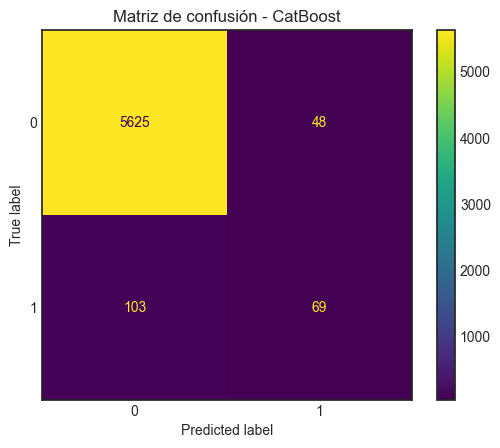


Generando classification report para CatBoost:

              precision    recall  f1-score   support

           0     0.9820    0.9915    0.9868      5673
           1     0.5897    0.4012    0.4775       172

    accuracy                         0.9742      5845
   macro avg     0.7859    0.6964    0.7321      5845
weighted avg     0.9705    0.9742    0.9718      5845

AUC-ROC (train): 0.9609
AUC-ROC (test) : 0.8819
PR-AUC  (train): 0.6102
PR-AUC  (test) : 0.5092


[{'Random_Forest': {'train_accuracy': 0.9758299110198494,
   'test_accuracy': 0.944054747647562,
   'conf_matrix': array([[5407,  266],
          [  61,  111]]),
   'classification_report': '              precision    recall  f1-score   support\n\n           0     0.9888    0.9531    0.9706      5673\n           1     0.2944    0.6453    0.4044       172\n\n    accuracy                         0.9441      5845\n   macro avg     0.6416    0.7992    0.6875      5845\nweighted avg     0.9684    0.9441    0.9540      5845\n'}},
 {'Random_Forest': {'auc-roc-train': 0.9653273813247069,
   'auc-roc-test': 0.8788672577980561,
   'pr-auc-train': 0.6908309524702807,
   'pr-auc-test': 0.4589019952853429}},
 {'GBM_sklearn': {'train_accuracy': 0.9753593429158111,
   'test_accuracy': 0.9616766467065868,
   'conf_matrix': array([[5534,  139],
          [  85,   87]]),
   'classification_report': '              precision    recall  f1-score   support\n\n           0     0.9849    0.9755    0.9802     

In [11]:
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
scale_pos_weight = n_neg / n_pos
scale_pos_weight

models = {
        "Random_Forest": RandomForestClassifier(
            n_estimators=600, random_state=42,
            n_jobs=-1,
            max_depth=12,
            min_samples_leaf=4,
            min_samples_split=5,
            max_features='sqrt',
        ),
        "GBM_sklearn": GradientBoostingClassifier(
            random_state=42,
            subsample=0.5,
            n_estimators=200,
            min_samples_split=80,
            min_samples_leaf=10,
            max_features='sqrt',
            max_depth=4,
            learning_rate=0.05
        ),
        "XGBoost": XGBClassifier(
            random_state=42,
            n_estimators=500,
            learning_rate=0.05,
            max_depth=4,
            subsample=0.8,
            colsample_bytree=0.8,
            gamma=2,
            reg_lambda=20,
            reg_alpha= 0.5,
            min_child_weight=30,
            tree_method="hist",
            scale_pos_weight=scale_pos_weight
        ),
        "LightGBM": LGBMClassifier(
            objective="binary",
            random_state=42,
            n_estimators=300,
            learning_rate=0.02,
            subsample_freq=1,
            max_depth=-1,
            subsample=0.8,
            colsample_bytree=0.8,
            min_child_samples=80,
            scale_pos_weight=scale_pos_weight,
            num_leaves=31,
        ),
        "CatBoost": CatBoostClassifier(
            random_state=42,
            iterations=300,
            learning_rate=0.03,
            depth=6,
            loss_function="Logloss",
            eval_metric="PRAUC",
            bootstrap_type="Bayesian",
            rsm=0.8,
            auto_class_weights="Balanced",
            bagging_temperature=0.5
        )
    }

metrics = []


models_not_smote = ["XGBoost", "LightGBM", "CatBoost"]

for name, model in models.items():

    if name not in models_not_smote:
        print(f"\nCalculamos el modelo {name} con oversampling Borderline Smote")
        rf_metrics, roc_auc_dict, fp_id, fn_id  = run_model_and_evaluate(
                name, model,
                X_train, y_train,
                X_test, y_test, "b_smote", 0.45
            )
        metrics.append({name: rf_metrics})
        metrics.append({name: roc_auc_dict})
    else:
        print(f"\nCalculamos el modelo {name} sin oversampling")
        rf_metrics, roc_auc_dict, fp_id, fn_id  = run_model_and_evaluate(
                name, model,
                X_train, y_train,
                X_test, y_test, None, 0.45
            )
        metrics.append({name: rf_metrics})
        metrics.append({name: roc_auc_dict})


metrics